In [9]:
import pandas as pd

nombre_columnas = ['E (eV)','P(E) (1/eV)']
df_A243 = pd.read_csv('Am_243_th_v3.dat', sep='\s+', header=None, names=nombre_columnas)
df_A243 = df_A243[(df_A243['E (eV)'] < 5.36E6) & (df_A243['E (eV)'] > 5.16E6) & (df_A243['P(E) (1/eV)'] > 1E-12)]

In [10]:
import plotly.express as px

# Asumiendo que df_U235 es tu DataFrame y ya está definido
fig = px.line(df_A243, x='E (eV)', y='P(E) (1/eV)', log_y=True, title='P(E) (1/eV) vs E (eV)')
fig.update_layout(xaxis_title='E (eV)', yaxis_title='P(E) (1/eV)', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [11]:
df_exp = pd.read_csv("Am_243.csv", sep=";")
df_exp = df_exp[['Channel','Value']]

# Definir el rango deseado en el eje X
#inicio = 5520
#fin = 6400

# Filtrar el DataFrame para incluir solo las filas dentro del rango
#df_exp = df_exp[(df_exp.index >= inicio) & (df_exp.index <= fin)].reset_index(drop=True)

# Graficar Suma en un eje X separado
fig = px.line(df_exp, x='Channel', y='Value', log_y=True, title='Experimento')
fig.update_layout(xaxis_title='Channel', yaxis_title='Value', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [15]:
from scipy.signal import find_peaks
import numpy as np

height_max_exp = np.percentile(df_exp['Value'],90)
height_max_th = np.percentile(df_A243['P(E) (1/eV)'],85)

peaks_th, _ = find_peaks(df_A243['P(E) (1/eV)'], height=height_max_th)
peaks_exp, _ = find_peaks(df_exp['Value'], height= height_max_exp)

if len(peaks_th) > 0:

    index_first_peak = peaks_th[0]
    y0_th = df_A243.iloc[index_first_peak]['P(E) (1/eV)']
    x0_th = df_A243.iloc[index_first_peak]['E (eV)']

    index_last_peak = peaks_th[-1]
    yf_th = df_A243.iloc[index_last_peak]['P(E) (1/eV)']
    xf_th = df_A243.iloc[index_last_peak]['E (eV)']

if len(peaks_exp)>0:
    index_first_peak = peaks_exp[0]
    y0_exp = df_exp.iloc[index_first_peak]['Value']
    x0_exp = index_first_peak

    index_last_peak = peaks_exp[-1]
    yf_exp = df_exp.iloc[index_last_peak]['Value']
    xf_exp = index_last_peak

my = (yf_th-y0_th)/(yf_exp-y0_exp)
by = yf_th - my*yf_exp


fitting_by = 0.45E-8
fitting_my = 0
df_exp['P(E) (1/eV) Predicted'] = (by+fitting_by) + (my+fitting_my)*df_exp['Value']


mx = (xf_th-x0_th)/(xf_exp-x0_exp)
bx = x0_th - mx*x0_exp

fitting_bx = 0
fitting_mx = 0
df_exp['E (eV) Predicted'] = (bx+fitting_bx)  + (mx+fitting_mx)*df_exp.index

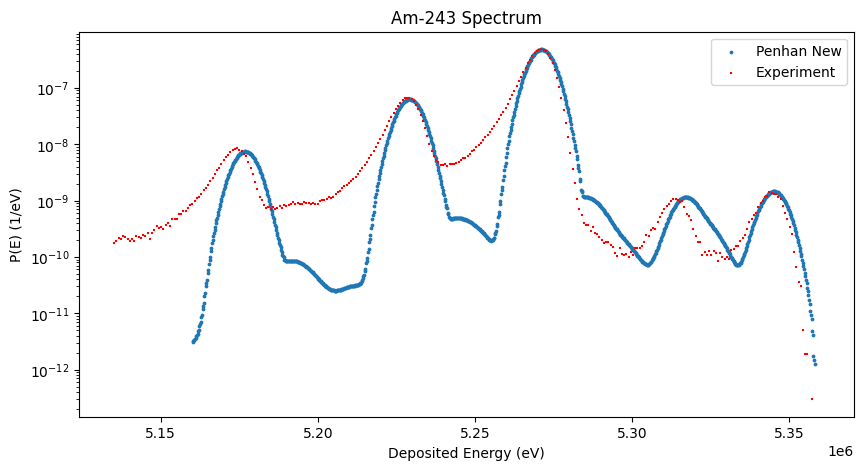

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df_A243['E (eV)'],
            df_A243['P(E) (1/eV)'], s= 3,
            marker ='o', label='Penhan New')
plt.scatter(df_exp['E (eV) Predicted'],
            df_exp['P(E) (1/eV) Predicted'], s= 4, marker='+',
            color='red', label='Experiment')
plt.title('Am-243 Spectrum')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')
plt.legend()
plt.show()

In [14]:
fig = px.line(df_exp, x='E (eV) Predicted', y='P(E) (1/eV) Predicted', log_y=True, title='Experimento')
fig.show()